<a href="https://colab.research.google.com/github/aapte11/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [52]:
'''7. Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year'''

'''Data Set Characteristics:  

Multivariate

Number of Instances:

306

Area:

Life

Attribute Characteristics:

Integer

Number of Attributes:

3'''


'Data Set Characteristics:  \n\nMultivariate\n\nNumber of Instances:\n\n306\n\nArea:\n\nLife\n\nAttribute Characteristics:\n\nInteger\n\nNumber of Attributes:\n\n3'

In [0]:
# TODO

# Load the data as a pandas data frame.
# Add informative names to the features.

import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
cols = ['age', 'operation_year', 'no_positive_nodes', 'survival']
df = pd.read_csv(url, header = None, names = cols)

In [54]:
# Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).

print ("The folder claims the number of observations is 306 and the actual number of observations is {}".format(len(df)))

The folder claims the number of observations is 306 and the actual number of observations is 306


In [55]:
# Validate that you have no missing values.

df.isnull().sum()

age                  0
operation_year       0
no_positive_nodes    0
survival             0
dtype: int64

In [56]:
print (df.survival.unique())

df.survival = 2 - df.survival # Cleanest way to do this

print (df.survival.unique())



[1 2]
[1 0]


In [57]:
df.head()

,age,operation_year,no_positive_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [58]:
# TODO

# Descriptive Statistics

df.describe()

,age,operation_year,no_positive_nodes,survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [59]:
# Correlation Matrix

df.corr()

,age,operation_year,no_positive_nodes,survival
age,1.000000,0.089529,-0.063176,-0.067950
operation_year,0.089529,1.000000,-0.003764,0.004768
no_positive_nodes,-0.063176,-0.003764,1.000000,-0.286768
survival,-0.067950,0.004768,-0.286768,1.000000


In [60]:
# Cross Tabluation

node_bin = pd.cut(df.no_positive_nodes, 10)

pd.crosstab(node_bin, df.survival, normalize = 'columns')

survival,0,1
no_positive_nodes,,
"(-0.052, 5.2]",0.567901,0.844444
"(5.2, 10.4]",0.148148,0.080000
"(10.4, 15.6]",0.135802,0.031111
"(15.6, 20.8]",0.049383,0.017778
"(20.8, 26.0]",0.074074,0.013333
"(26.0, 31.2]",0.000000,0.008889
"(31.2, 36.4]",0.012346,0.000000
"(36.4, 41.6]",0.000000,0.000000
"(41.6, 46.8]",0.000000,0.004444


In [61]:
age_bins = pd.cut(df.age, 5)

pd.crosstab(age_bins, df.survival, normalize = 'columns')

survival,0,1
age,,
"(29.947, 40.6]",0.049383,0.173333
"(40.6, 51.2]",0.382716,0.302222
"(51.2, 61.8]",0.333333,0.306667
"(61.8, 72.4]",0.197531,0.191111
"(72.4, 83.0]",0.037037,0.026667


In [62]:
pd.crosstab(df.operation_year, df.survival, normalize = 'columns')

survival,0,1
operation_year,,
58,0.148148,0.106667
59,0.111111,0.080000
60,0.049383,0.106667
61,0.037037,0.102222
62,0.086420,0.071111
63,0.098765,0.097778
64,0.098765,0.102222
65,0.160494,0.066667
66,0.074074,0.097778


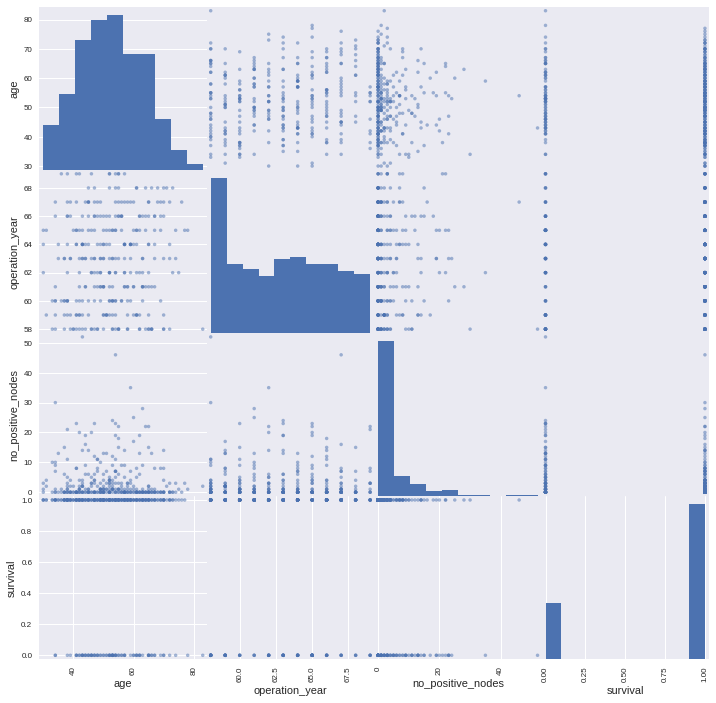

In [63]:
# Scatter Matrix - Shows Histograms and Scatter Plots

from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize = (12,12));

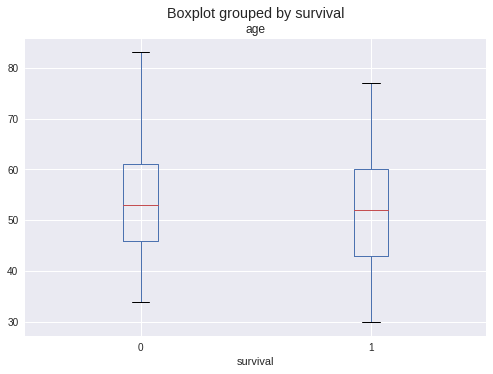

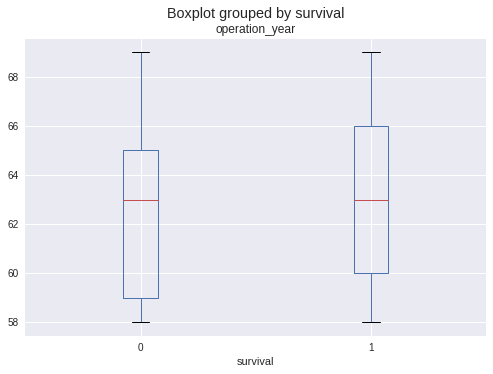

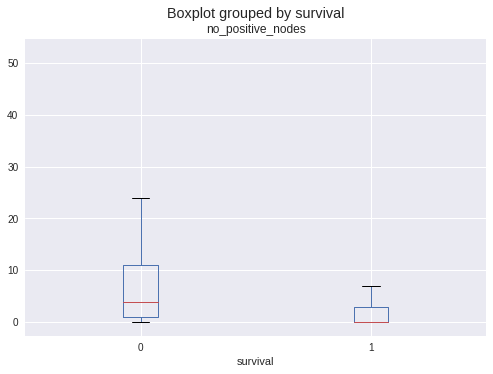

In [64]:
# Boxplots

df.boxplot(column = 'age', by = 'survival')
df.boxplot(column = 'operation_year', by = 'survival')
df.boxplot(column = 'no_positive_nodes', by = 'survival')

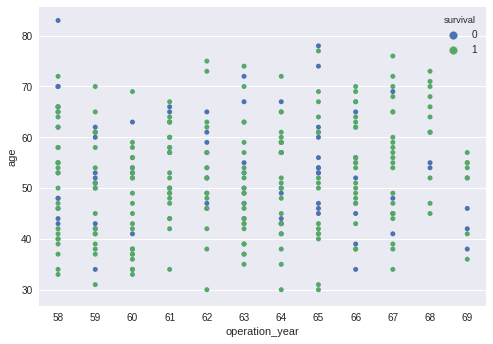

In [68]:
# Scatter Plots

import seaborn as sns

sns.stripplot(df.operation_year, df.age,  hue = df.survival);

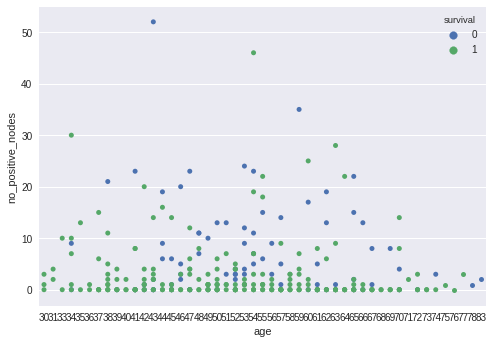

In [66]:
sns.stripplot(df.age, df.no_positive_nodes, hue = df.survival);

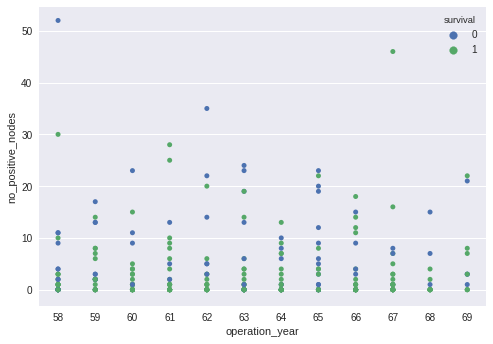

In [67]:
sns.stripplot(df.operation_year, df.no_positive_nodes, hue = df.survival);

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?

**There is a weakly positive correlation between the operation year and survival. This relationship makes sense if one assumes that later hospital years have more advanced technology that can help improves the chances of survival.**

- What is at least one feature that looks to have a negative correlation with survival?

**From the correlation matrix and the boxplot, one can conclude that survival has a negative correlation with the number of positive nodes. This matches the intuition of the relationship that more positive nodes translates to a stronger illness which lowers the chances of survival.**

- How are those two features related with each other, and what might that mean?

**If one assumes that operation year is a proxy for the state of medical technology and that the number of positive nodes is a proxy for illness, then one can intuitively state that as medical technology improves, the level of illness decreases (earlier detection and better treatment) and thus the chances of survival increase as shown in the seaborn scatterplot above. **

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.